<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 28: Designing Experiments

Associated Textbook Sections: [14.6](https://inferentialthinking.com/chapters/14/6/Choosing_a_Sample_Size.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-28:-Designing-Experiments" data-toc-modified-id="Lecture-28:-Designing-Experiments-1">Lecture 28: Designing Experiments</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Confidence-Intervals" data-toc-modified-id="Confidence-Intervals-1.3">Confidence Intervals</a></span><ul class="toc-item"><li><span><a href="#Graph-of-the-Distribution" data-toc-modified-id="Graph-of-the-Distribution-1.3.1">Graph of the Distribution</a></span></li><li><span><a href="#The-Key-to-95%-Confidence" data-toc-modified-id="The-Key-to-95%-Confidence-1.3.2">The Key to 95% Confidence</a></span></li><li><span><a href="#Constructing-the-Interval" data-toc-modified-id="Constructing-the-Interval-1.3.3">Constructing the Interval</a></span></li><li><span><a href="#The-Interval" data-toc-modified-id="The-Interval-1.3.4">The Interval</a></span></li><li><span><a href="#Width-of-the-Interval" data-toc-modified-id="Width-of-the-Interval-1.3.5">Width of the Interval</a></span></li></ul></li><li><span><a href="#Sample-Proportions" data-toc-modified-id="Sample-Proportions-1.4">Sample Proportions</a></span><ul class="toc-item"><li><span><a href="#Proportions-are-Averages" data-toc-modified-id="Proportions-are-Averages-1.4.1">Proportions are Averages</a></span></li><li><span><a href="#Confidence-Interval" data-toc-modified-id="Confidence-Interval-1.4.2">Confidence Interval</a></span></li><li><span><a href="#Controlling-the-Width" data-toc-modified-id="Controlling-the-Width-1.4.3">Controlling the Width</a></span></li><li><span><a href="#The-Sample-Size-for-a-Given-Width" data-toc-modified-id="The-Sample-Size-for-a-Given-Width-1.4.4">The Sample Size for a Given Width</a></span></li><li><span><a href="#Demo:-SD-of-0/1-Population" data-toc-modified-id="Demo:-SD-of-0/1-Population-1.4.5">Demo: SD of 0/1 Population</a></span></li><li><span><a href="#&quot;Worst-Case&quot;-Population-SD" data-toc-modified-id="&quot;Worst-Case&quot;-Population-SD-1.4.6">"Worst Case" Population SD</a></span></li><li><span><a href="#Example" data-toc-modified-id="Example-1.4.7">Example</a></span></li><li><span><a href="#Another-Example" data-toc-modified-id="Another-Example-1.4.8">Another Example</a></span></li></ul></li></ul></li></ul></div>

## Confidence Intervals

### Graph of the Distribution

<img src="img/lec28_approx_dist_sample_ave.png" width=50%>

### The Key to 95% Confidence 

<img src="img/lec28_95_confidence.png" width=80%>

* For about 95% of all samples, the sample average and population average are within 2 SDs of each other.
* SD = SD of sample average = $(\text{population SD}) / \sqrt{\text{sample size}}$


### Constructing the Interval

For 95% of all samples,

* If you stand at the population average and look two SDs on both sides, you will find the sample average.
* Distance is symmetric.
* So if you stand at the sample average and look two SDs on both sides, you will capture the population average.


### The Interval

<img src="img/lec28_the_interval_mean.png" width=80%>

### Width of the Interval

Total width of a 95% confidence interval for the population average

* $=  4 * \text{SD of the sample average}$
* $=  4 * (\text{population SD}) / \sqrt{\text{sample size}}$


## Sample Proportions

### Proportions are Averages

* Data: 0 1 0 0 1 0 1 1 0 0 (10 entries)
    * Sum  =  4  (number of 1's)
    * Average  =  4/10  =  0.4 (proportion of 1's)
* If the population consists of 1's and 0's (yes/no answers to a question), then:
    * the population average is the proportion of 1's in the population
    * the sample average is the proportion of 1's in the sample


### Confidence Interval

<img src="img/lec28_the_interval_prop.png" width=80%>

### Controlling the Width

* Total width of an approximate 95% confidence interval for a population proportion is equal to 

$$4 * (\text{SD of 0/1 population}) / \sqrt{\text{sample size}}$$

* The narrower the interval, the more precise your estimate.
* Suppose you want the total width of the interval to be no more than 1%. How should you choose the sample size?


### The Sample Size for a Given Width

* $0.01  =  4 * (\text{SD of 0/1 population}) / \sqrt{\text{sample size}}$
* Left side: 1%, the max total width that you'll accept
* Right side: formula for the total width
* $\sqrt{\text{sample size}} =  4 * (\text{SD of 0/1 population}) / 0.01$



### Demo: SD of 0/1 Population

Create a population of size 10

In [2]:
number_of_ones = 2
zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
zero_one_population

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [3]:
np.std(zero_one_population)

0.4000000000000001

Let's make a graph with proportion of ones on the x axis and SD on the y axis.

In [4]:
def sd_of_zero_one_population(number_of_ones):
    """SD of a population with num_ones ones and (10 - num_ones) zeros"""
    zero_one_population = np.append(np.ones(number_of_ones), np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [5]:
poss_ones = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of ones', poss_ones,
    'Proportion of ones', poss_ones / 10
)

In [6]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)

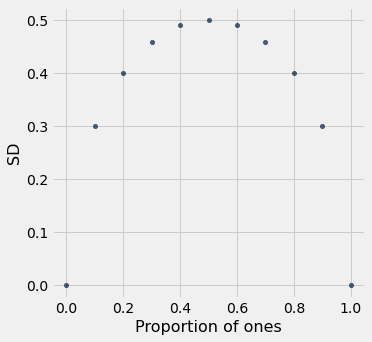

In [7]:
zero_one_pop.scatter('Proportion of ones', 'SD')

### "Worst Case" Population SD

* $\sqrt{\text{sample size}} =  4 * (\text{SD of 0/1 population}) / 0.01$
* SD of 0/1 population is at most 0.5
* $\sqrt{\text{sample size}} \geq 4 * 0.5 / 0.01$
* $\text{sample size} \geq  (4 * 0.5 / 0.01)^ 2   =   40000$
* The sample size should be 40,000 or more


### Example

* A researcher is estimating a population proportion based on a random sample of size 10,000. 
* With chance at least 95%, the estimate will be correct to within 1%.

In [8]:
2 * 0.5 / (10000) ** (1/2)

0.01

### Another Example

* I am going to use a 68% confidence interval to estimate a population proportion. 
* I want the total width of my interval to be no more than 2.5%.
* How large must my random sample be?
* $2 * \frac{0.5}{\sqrt{\text{sample_size}}} = 0.025$


In [9]:
# After solving for sample_size
sample_size = ((2 * 0.5) / 0.025 ) ** 2
sample_size

1600.0

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>